In [67]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
planilha = '/content/drive/MyDrive/Colab Notebooks/Projeto - Preço de Combustíveis/combustiveis-liquidos-municipios.xlsx'

In [26]:
df = pd.read_excel(planilha, skiprows=8)

In [27]:
# Atualiza o dataframe excluindo somente as duas ultimas linhas
df = df.iloc[:-2]

In [ ]:
df.head()

In [ ]:
df.info()

# Limpeza do dataframe

In [30]:
colunas_numericas = [
    'PREÇO MÉDIO DE DISTRIBUIÇÃO',
    'DESVIO PADRÃO'
]

# Remover vírgulas, converter para ponto e transformar em float

for col in colunas_numericas:
  df[col] = df[col].replace(' - ', pd.NA)
  df[col] = df[col].astype(str).str.replace(',', '.').str.replace(' ', '')
  df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.head()

## Padronizar tipos de dados

In [32]:
colunas_texto = [
    'PRODUTO',
    'REGIÃO',
    'ESTADO',
    'MUNICÍPIO',
    'UNIDADE DE MEDIDA'
]

# Força a conversão para string

for col in colunas_texto:
  df[col] = df[col].astype(str)

In [ ]:
df.info()

In [34]:
df['MÊS'] = pd.to_datetime(df['MÊS'])

In [ ]:
df.info()

## Verificar e remover colunas com valores iguais

In [35]:
# Mostra se a coluna tem dados distintos
df['UNIDADE DE MEDIDA'].nunique()

1

In [36]:
# Exclui uma coluna irrelevante pois tem todos os registros iguais
df.drop(columns=['UNIDADE DE MEDIDA'], inplace=True)

In [37]:
# Padroniza os nomes das colunas para minpusculas e separadas por underscore
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [38]:
# Identifica se há dados duplicados
df.duplicated().sum()

np.int64(0)

In [39]:
# Excluir dados duplicados
df.drop_duplicates(inplace=True)

In [ ]:
# Identifica a quantidade de dados nulos
df.isnull().sum()

In [ ]:
df.head()

# Análise exploratória

## Média dos preços por produto

In [97]:
df.groupby('produto')['preço_médio_de_distribuição'].mean().sort_values(ascending=False)

,preço_médio_de_distribuição
produto,
GASOLINA C COMUM ADITIVADA,5.133263
GASOLINA C COMUM,5.075165
ÓLEO DIESEL B S10 - COMUM,5.023863
ÓLEO DIESEL B S500 - COMUM,4.952879
ETANOL HIDRATADO COMUM,3.629985


## Preço médio por estado

In [57]:
df.groupby('estado')['preço_médio_de_distribuição'].mean().sort_values(ascending=False)

,preço_médio_de_distribuição
estado,
ACRE,5.275275
AMAPA,5.177571
AMAZONAS,5.036311
RONDONIA,5.018811
PARA,4.990127
RORAIMA,4.983798
CEARA,4.949162
ALAGOAS,4.933879
PIAUI,4.920036


## Evolução de preço ao longo do tempo para a gasolina

<Axes: xlabel='mês'>

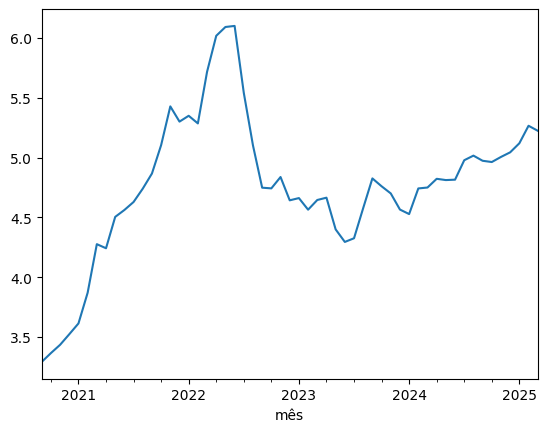

In [108]:
df_gasolina = df[df['produto'] == 'GASOLINA C COMUM']

df.groupby('mês')['preço_médio_de_distribuição'].mean().plot()